In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
!pip install xlrd

  Using cached https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
data=pd.read_excel('../data/default of credit card clients.xls')

In [5]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [6]:
data.shape

(30000, 24)

In [7]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

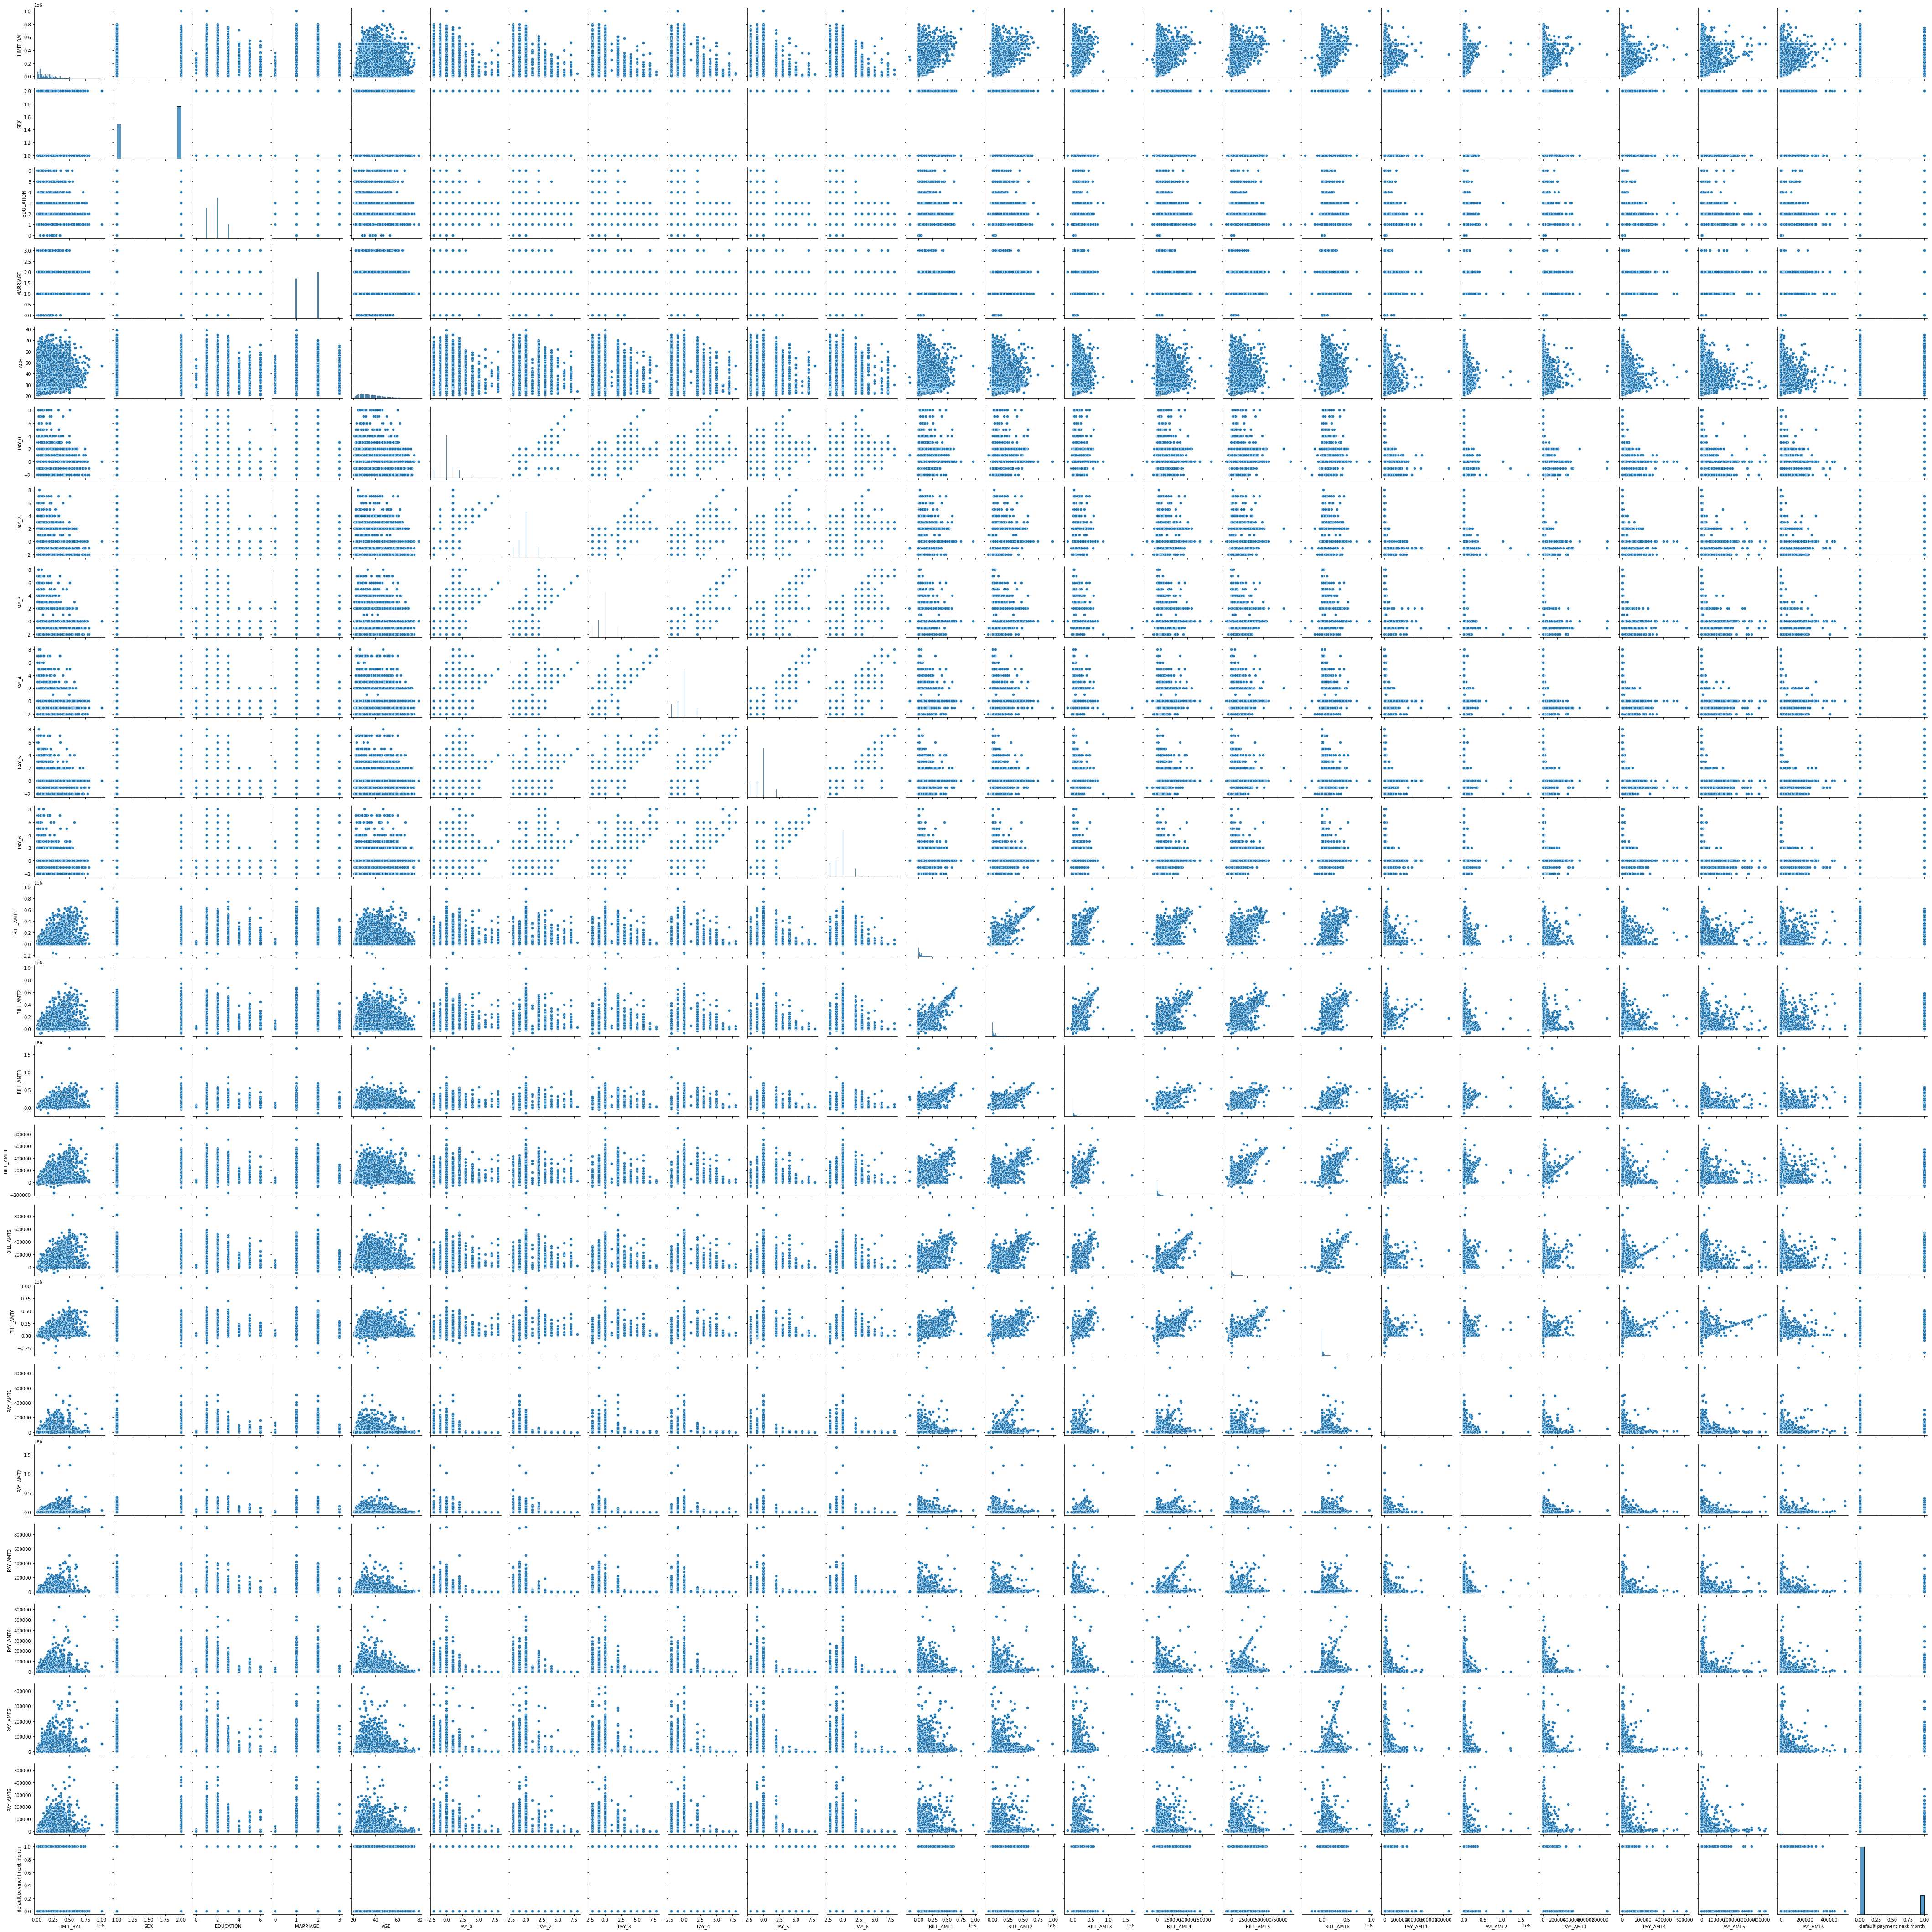

In [9]:
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


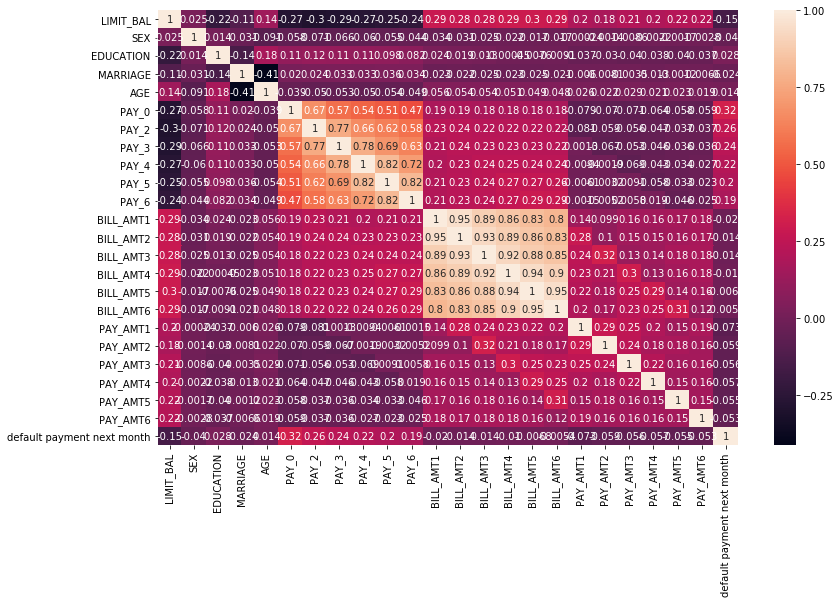

In [34]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True )

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 


array([1, 1, 1, ..., 0, 1, 1])

In [46]:

#apply kmeans clustering
from sklearn.cluster import KMeans
#divide data into clusters
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42) 
#fit the data
kmeans.fit(data)
#predict the cluster for each data point
cluster_labels=kmeans.predict(data)
#create a new column called cluster in data frame
data['cluster']=cluster_labels
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...          0          0         0       689         0         0   
1      0  ...       3455       3261         0      1000      1000      1000   
2      0  ...      14948      15549      1518      1500      1000      1000   
3      0  ...      28959      29547      2000      2019      1200      1100   
4      0  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month  cluster  
0         0         0                           1        0  
1         0      2000                           1        0  
2      1000      5000                           0        0  
3      1069      1000                           0        0  
4       689       679                           0        0  

[5 rows x 25 columns]

In [49]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
data3=data[data['cluster']==2]
data4=data[data['cluster']==3]



In [50]:
#data1
#y values
y1=data1['default payment next month']
#x values
x1=data1.drop(['default payment next month','cluster'],axis=1)
#standardize the x1 values
x1= (x1-x1.mean())/x1.std()

#train test split
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=42)


In [51]:
#data2
#y values
y2=data2['default payment next month']
#x values
x2=data2.drop(['default payment next month','cluster'],axis=1)
#standardize the x2 values
x2= (x2-x2.mean())/x2.std()

#train test split
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.3,random_state=42)


In [53]:
#data3
#y values
y3=data3['default payment next month']
#x values
x3=data3.drop(['default payment next month','cluster'],axis=1)
#standardize the x3 values
x3= (x3-x3.mean())/x3.std()
#train test split
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.3,random_state=42)

#data4
#y values
y4=data4['default payment next month']
#x values
x4=data4.drop(['default payment next month','cluster'],axis=1)
#standardize the x4 values
x4= (x4-x4.mean())/x4.std()
#train test split
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.3,random_state=42)


0.7705151700264712
0.6763285024154589
0.31203566121842496


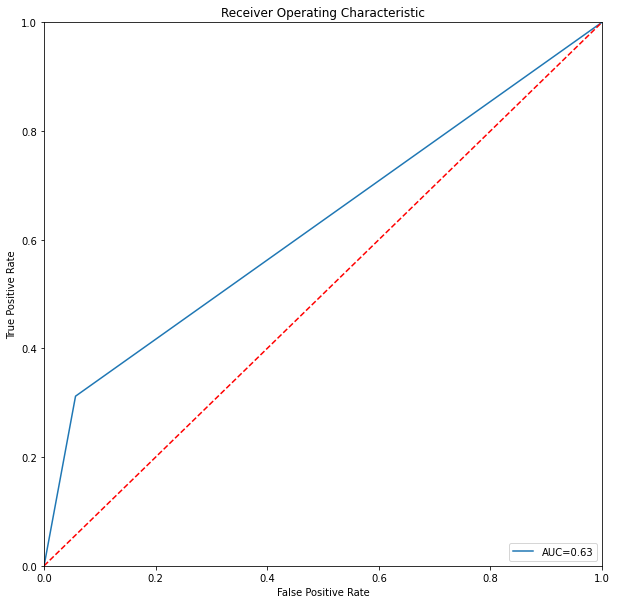

In [57]:
#data1
#classifier
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(x_train1,y_train1)
#predict
y_pred1=classifier1.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test1,y_pred1)
cm1
#accuracy
print((cm1[0][0]+cm1[1][1])/len(y_test1))
#precision
print(cm1[1][1]/(cm1[1][1]+cm1[0][1]))
#recall
print(cm1[1][1]/(cm1[1][1]+cm1[1][0]))

#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr1,tpr1,thresholds1=roc_curve(y_test1,y_pred1)
roc_auc1=roc_auc_score(y_test1,y_pred1)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1,tpr1,label='AUC=%0.2f'%roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[[2712  853]
 [ 754  592]]
0.6727754021584199
0.4096885813148789
0.4398216939078752


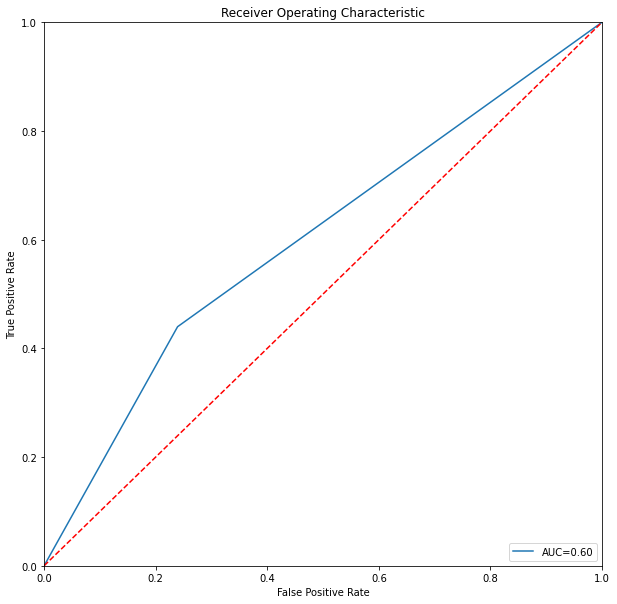

In [58]:
#data1
#classifier
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier()
classifier2.fit(x_train1,y_train1)
#predict
y_pred2=classifier2.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test1,y_pred2)
print(cm2)
#accuracy
print((cm2[0][0]+cm2[1][1])/len(y_test1))
#precision
print(cm2[1][1]/(cm2[1][1]+cm2[0][1]))
#recall
print(cm2[1][1]/(cm2[1][1]+cm2[1][0]))

#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr2,tpr2,thresholds2=roc_curve(y_test1,y_pred2)
roc_auc2=roc_auc_score(y_test1,y_pred2)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2,tpr2,label='AUC=%0.2f'%roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[[3292  273]
 [ 820  526]]
0.7774384035837915
0.6583229036295369
0.39078751857355126


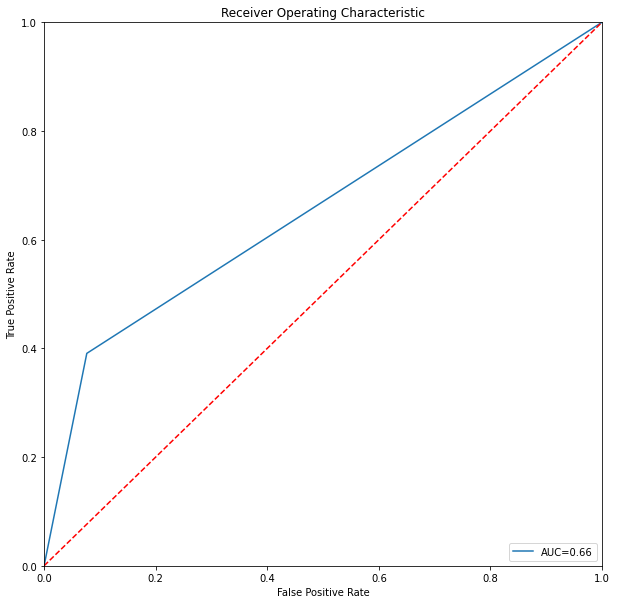

In [59]:
#data1
#classifier
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier()
classifier3.fit(x_train1,y_train1)
#predict
y_pred3=classifier3.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test1,y_pred3)
print(cm3)
#accuracy
print((cm3[0][0]+cm3[1][1])/len(y_test1))
#precision
print(cm3[1][1]/(cm3[1][1]+cm3[0][1]))
#recall
print(cm3[1][1]/(cm3[1][1]+cm3[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr3,tpr3,thresholds3=roc_curve(y_test1,y_pred3)
roc_auc3=roc_auc_score(y_test1,y_pred3)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,label='AUC=%0.2f'%roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[[3162  403]
 [ 833  513]]
0.7483200977397678
0.5600436681222707
0.38112927191679047


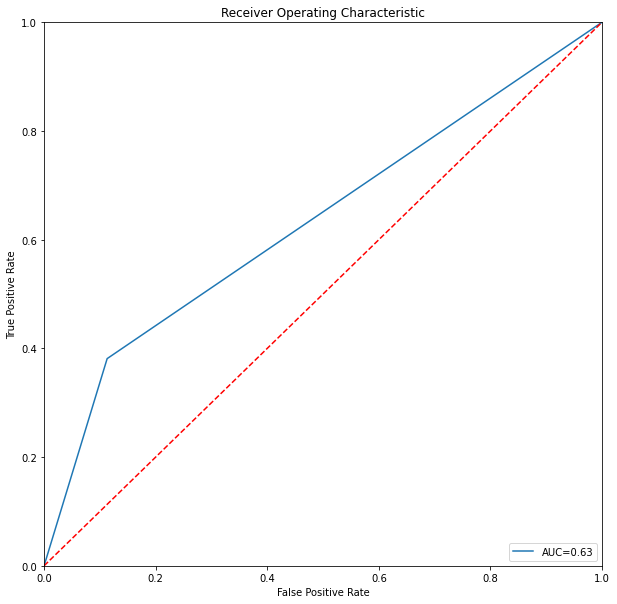

In [60]:
#data1
#classifier
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier4=KNeighborsClassifier()
classifier4.fit(x_train1,y_train1)
#predict
y_pred4=classifier4.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test1,y_pred4)
print(cm4)
#accuracy
print((cm4[0][0]+cm4[1][1])/len(y_test1))
#precision
print(cm4[1][1]/(cm4[1][1]+cm4[0][1]))
#recall
print(cm4[1][1]/(cm4[1][1]+cm4[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr4,tpr4,thresholds4=roc_curve(y_test1,y_pred4)
roc_auc4=roc_auc_score(y_test1,y_pred4)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4,tpr4,label='AUC=%0.2f'%roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



[[2198 1367]
 [ 400  946]]
0.6401954795357361
0.4089926502377864
0.7028231797919762


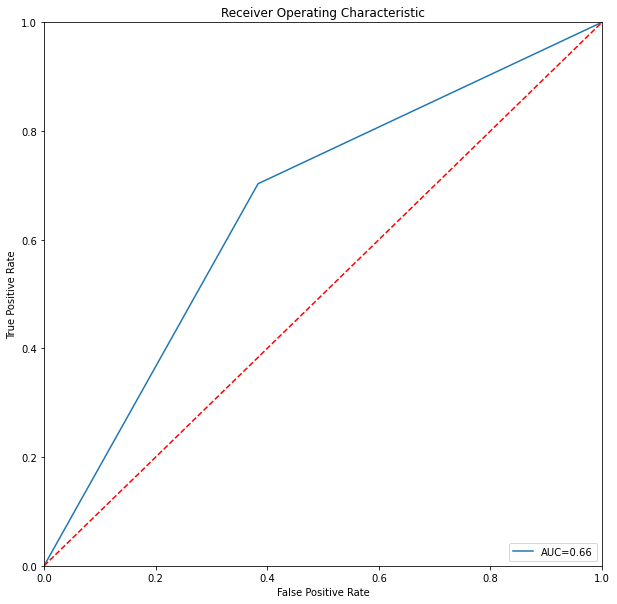

In [61]:
#data1
#classifier
#naive bayes
from sklearn.naive_bayes import GaussianNB
classifier5=GaussianNB()
classifier5.fit(x_train1,y_train1)
#predict
y_pred5=classifier5.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test1,y_pred5)
print(cm5)
#accuracy
print((cm5[0][0]+cm5[1][1])/len(y_test1))
#precision
print(cm5[1][1]/(cm5[1][1]+cm5[0][1]))
#recall
print(cm5[1][1]/(cm5[1][1]+cm5[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr5,tpr5,thresholds5=roc_curve(y_test1,y_pred5)
roc_auc5=roc_auc_score(y_test1,y_pred5)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr5,tpr5,label='AUC=%0.2f'%roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



[[3344  221]
 [ 851  495]]
0.7817145184280188
0.6913407821229051
0.36775631500742945


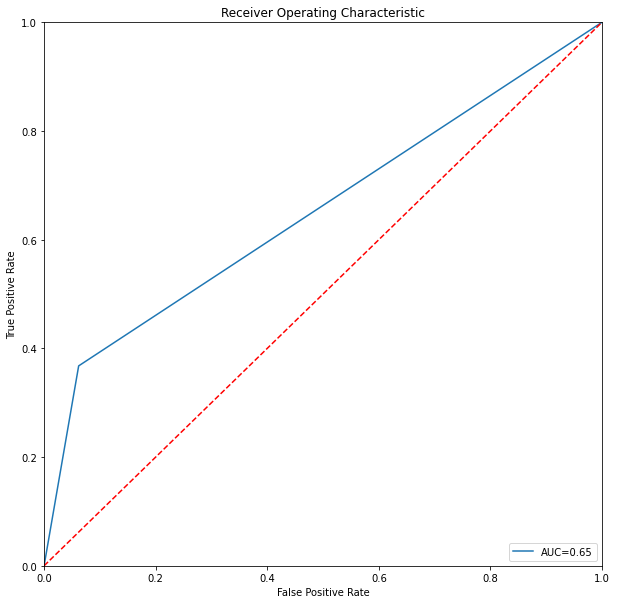

In [62]:
#data1
#classifier
#svm
from sklearn.svm import SVC
classifier6=SVC()
classifier6.fit(x_train1,y_train1)
#predict
y_pred6=classifier6.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test1,y_pred6)
print(cm6)
#accuracy
print((cm6[0][0]+cm6[1][1])/len(y_test1))
#precision
print(cm6[1][1]/(cm6[1][1]+cm6[0][1]))
#recall
print(cm6[1][1]/(cm6[1][1]+cm6[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr6,tpr6,thresholds6=roc_curve(y_test1,y_pred6)
roc_auc6=roc_auc_score(y_test1,y_pred6)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr6,tpr6,label='AUC=%0.2f'%roc_auc6)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



[[3162  403]
 [ 833  513]]
0.7483200977397678
0.5600436681222707
0.38112927191679047


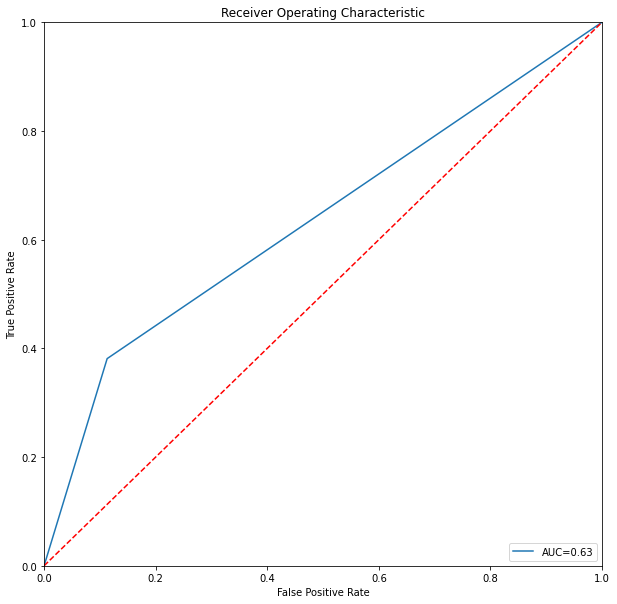

In [63]:
#data1
#classifier
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier7=KNeighborsClassifier()
classifier7.fit(x_train1,y_train1)
#predict
y_pred7=classifier7.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test1,y_pred7)
print(cm7)
#accuracy
print((cm7[0][0]+cm7[1][1])/len(y_test1))
#precision
print(cm7[1][1]/(cm7[1][1]+cm7[0][1]))
#recall
print(cm7[1][1]/(cm7[1][1]+cm7[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr7,tpr7,thresholds7=roc_curve(y_test1,y_pred7)
roc_auc7=roc_auc_score(y_test1,y_pred7)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr7,tpr7,label='AUC=%0.2f'%roc_auc7)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



[11:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[3273  292]
 [ 821  525]]
0.773365913255956
0.642594859241126
0.3900445765230312


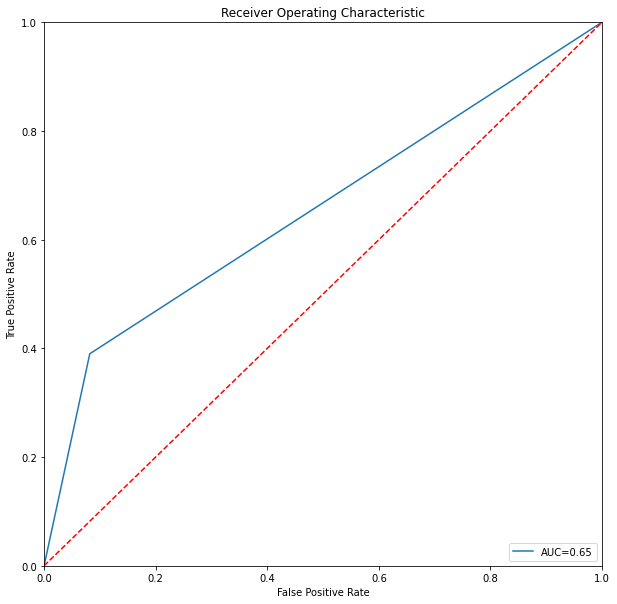

In [64]:
#data1
#classifier
#xgboost
from xgboost import XGBClassifier
classifier8=XGBClassifier()
classifier8.fit(x_train1,y_train1)
#predict
y_pred8=classifier8.predict(x_test1)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm8=confusion_matrix(y_test1,y_pred8)
print(cm8)
#accuracy
print((cm8[0][0]+cm8[1][1])/len(y_test1))
#precision
print(cm8[1][1]/(cm8[1][1]+cm8[0][1]))
#recall
print(cm8[1][1]/(cm8[1][1]+cm8[1][0]))
#roc curve and auc
from sklearn.metrics import roc_curve,roc_auc_score
fpr8,tpr8,thresholds8=roc_curve(y_test1,y_pred8)
roc_auc8=roc_auc_score(y_test1,y_pred8)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr8,tpr8,label='AUC=%0.2f'%roc_auc8)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [8]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [11]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [12]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [13]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [14]:
scaled_train_df.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
16831  -0.365093 -1.238563   1.448725 -1.054777  1.464785  0.015441 -0.724837   
4222   -1.061279 -1.238563  -1.073197  0.861786  0.271955  1.794063  0.110028   
8736   -0.597155  0.807387   0.187764  0.861786  0.380394  0.015441  0.110028   
27880  -0.287739  0.807387   1.448725 -1.054777 -1.029313  0.015441  0.110028   
29290  -0.906571 -1.238563   1.448725  0.861786 -1.029313  1.794063  0.110028   

          PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
16831 -0.697423 -0.668007 -0.647249  ...  -0.642576  -0.661257  -0.529514   
4222   0.141588  0.189890  0.238910  ...   0.228168   0.224623   0.099678   
8736   0.141588  0.189890  0.238910  ...  -0.067356  -0.081444  -0.154738   
27880  1.819611  1.905684  2.011229  ...   1.169781   1.409281   1.438216   
29290  0.141588  0.189890  0.238910  ...  -0.068136  -0.166675  -0.389455   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
16831  -0.579208 -0.105018 -0.145558 -0.242409  0.201062 -0.014852 -0.233621  
4222    0.583327 -0.095828 -0.039170  0.152840 -0.212528  2.237818  0.268573  
8736   -0.181984 -0.213650 -0.157335 -0.219417 -0.239691 -0.231210 -0.254511  
27880   1.562072  0.316551 -0.133702  0.207584 -0.302252  0.074237 -0.012958  
29290  -0.369159 -0.210882 -0.010496 -0.213942 -0.228875 -0.268309 -0.257889  

[5 rows x 23 columns]

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [41]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
ac=accuracy_score(y_test, pred_y)
ac

0.6601010101010101

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [47]:

#finding the best parameters
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.579, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.662, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.714, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.648, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.689, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.667, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=0.001, score=0.663, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.714, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.649, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.690, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.795, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
grid.best_estimator_

GaussianNB(priors=None, var_smoothing=0.5)

In [49]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [51]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.7792929292929293

In [68]:
param_grid_xgboost = {

                               "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
                               "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [69]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 17.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130, 200],
                         'random_state': [0, 50, 100, 250, 355, 5

In [70]:
grid.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,             
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [72]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [73]:
ac_xgb_new 

0.8203030303030303

In [15]:
#apply kmeans clustering
from sklearn.cluster import KMeans
#divide data into clusters
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42) 
y_kmeans=kmeans.fit_predict(scaled_train_df)


In [16]:
#create a new dataframe with cluster column
cluster_df=pd.DataFrame(data=y_kmeans, columns=['cluster'], index=scaled_train_df.index) 


In [17]:
#concatenate the cluster column to the original dataframe 
cluster_df=pd.concat([scaled_train_df,cluster_df],axis=1)


In [18]:
#divide the data into 4 clusters
cluster_df.groupby('cluster').mean() 

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
cluster                                                                 
0         0.918796 -0.051627  -0.064868 -0.083975  0.160116  0.208719   
1        -0.686633 -0.121845   0.170715 -0.025956 -0.045651  1.456062   
2         0.441173  0.102777  -0.253180 -0.122468  0.133535 -0.710414   
3        -0.380385 -0.031743   0.152704  0.109820 -0.120779  0.125054   

            PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  \
cluster                                          ...                         
0        0.262747  0.273141  0.287038  0.319575  ...   2.128999   2.161197   
1        1.686113  1.778017  1.765637  1.685520  ...  -0.088532  -0.045250   
2       -0.917168 -0.965462 -0.968672 -0.945534  ...  -0.593164  -0.587922   
3        0.204302  0.215238  0.216668  0.209929  ...  -0.096226  -0.116894   

         BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
cluster                                                                 
0         2.139182   2.098161  0.648391  0.481197  0.557501  0.533437   
1        -0.015747   0.002070 -0.194079 -0.153243 -0.186389 -0.187120   
2        -0.569946  -0.557274 -0.058116 -0.027742 -0.019841 -0.007851   
3        -0.130080  -0.132504 -0.077557 -0.066123 -0.083139 -0.085298   

         PAY_AMT5  PAY_AMT6  
cluster                      
0        0.567362  0.473566  
1       -0.192008 -0.193032  
2       -0.005401  0.016344  
3       -0.094231 -0.085943  

[4 rows x 23 columns]

In [19]:
#based on clusters divide and save the data into different dataframes
cluster_0=cluster_df[cluster_df['cluster']==0]
cluster_1=cluster_df[cluster_df['cluster']==1]
cluster_2=cluster_df[cluster_df['cluster']==2]
cluster_3=cluster_df[cluster_df['cluster']==3]


In [20]:
cluster_0

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
27880  -0.287739  0.807387   1.448725 -1.054777 -1.029313  0.015441  0.110028   
5063    0.253740  0.807387   0.187764  0.861786 -0.270240  0.015441  0.110028   
15409  -0.210384  0.807387   0.187764 -1.054777  1.356346  0.015441  0.110028   
16030   3.115839  0.807387  -1.073197  0.861786 -0.595557  0.015441  0.110028   
3887    1.027280 -1.238563   1.448725  0.861786  0.814151  0.015441  0.110028   
...          ...       ...        ...       ...       ...       ...       ...   
24118   2.574361 -1.238563  -1.073197  0.861786 -0.920874  0.015441  0.110028   
25551   1.878174  0.807387   0.187764 -1.054777  0.705711  0.015441  0.110028   
2747    0.949926  0.807387   0.187764 -1.054777  0.271955  0.015441  0.110028   
11964  -0.055676  0.807387   0.187764 -1.054777  0.705711  0.015441  0.110028   
5390    0.253740 -1.238563  -1.073197  0.861786  0.163516  1.794063  1.779758   

          PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
27880  1.819611  1.905684  2.011229  ...   1.409281   1.438216   1.562072   
5063   0.141588  0.189890  0.238910  ...   2.296867   2.538845   2.714838   
15409  0.141588  0.189890  0.238910  ...   3.291116   3.617343   3.664309   
16030  0.141588 -0.668007  0.238910  ...   0.484274   0.290416   0.203897   
3887   0.141588  0.189890  0.238910  ...   1.559405   1.631567   1.670940   
...         ...       ...       ...  ...        ...        ...        ...   
24118  0.141588  0.189890  0.238910  ...   8.976578   3.479913   4.358237   
25551  0.141588  0.189890  0.238910  ...   5.422527   4.997098   5.183755   
2747   0.141588  0.189890  0.238910  ...   1.725627   1.918765   2.033930   
11964  0.141588  0.189890  0.238910  ...   1.196501   1.353863   1.228679   
5390   1.819611  1.905684  2.011229  ...   1.895071   2.130740   2.256508   

       PAY_AMT1   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  cluster  
27880  0.316551  -0.133702  0.207584 -0.302252  0.074237 -0.012958        0  
5063   0.048505   0.023851  0.007770  0.035748  0.144235  0.015195        0  
15409  0.257640   0.165649  0.207584  0.250840  0.328776  0.268573        0  
16030  2.641661   1.078353  3.770578 -0.284430  2.944609  2.058601        0  
3887   0.011567  -0.026960  0.005142  0.007172  0.018111 -0.039309        0  
...         ...        ...       ...       ...       ...       ...      ...  
24118  1.437750  10.463153  1.405157  3.387732  2.908464  5.367768        0  
25551  0.730461   0.473901  0.486503  0.437478  0.648604  0.438955        0  
2747   0.021995   0.000612  0.021456  0.048039  0.055146  0.043348        0  
11964  0.166327  -0.027787 -0.064930 -0.044450 -0.053924 -0.071629        0  
5390   0.463829   0.000218 -0.285109  0.158658  0.074237 -0.069264        0  

[2296 rows x 24 columns]